# Manipulating data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from urllib.request import urlretrieve
plt.style.use('ggplot')

In [2]:
!pip install xlrd==1.2.0 --quiet

In [3]:
store = pd.read_excel('superstore.xls')
store.head(8)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152


In [4]:
def clean_cols(df):
  new_cols = []
  for col in df.columns:
    new_cols.append(col.replace(' ', '_').lower())
  df.columns = new_cols
  

clean_cols(store)

In [5]:
store.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [6]:
store.drop(columns=['row_id'], inplace=True)
store.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'sub-category', 'product_name',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [7]:
store.shape

(9994, 20)

# Subsetting the DataFrame

In [8]:
store.loc[[i for i in range(5,10)], ['customer_id', 'customer_name', 'city', 'postal_code', 'sales']]

,customer_id,customer_name,city,postal_code,sales
5,BH-11710,Brosina Hoffman,Los Angeles,90032,48.860
6,BH-11710,Brosina Hoffman,Los Angeles,90032,7.280
7,BH-11710,Brosina Hoffman,Los Angeles,90032,907.152
8,BH-11710,Brosina Hoffman,Los Angeles,90032,18.504
9,BH-11710,Brosina Hoffman,Los Angeles,90032,114.900


## Determining Statistics on Sales and Profit

In [9]:
store.loc[[i for i in range(100, 200)], ['sales', 'profit']].describe().T

,count,mean,std,min,25%,50%,75%,max
sales,100.0,262.957220,858.983762,1.788,21.3270,66.9600,177.0950,8159.952
profit,100.0,0.347574,170.744869,-1359.992,1.6359,9.6536,23.4588,585.552


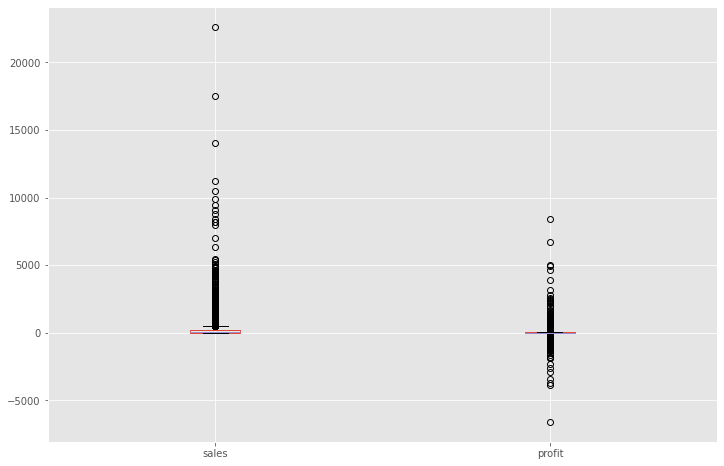

In [10]:
plt.figure(figsize=(12, 8))
store[['sales', 'profit']].boxplot()

## The unique Function

In [11]:
store['country'].unique()

array(['United States'], dtype=object)

In [12]:
store.city.unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [13]:
store.city.nunique()

531

In [14]:
store.state.unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [15]:
store.state.nunique()

49

## Conditional Selection and Boolean Filtering

In [16]:
store[['sales', 'profit']][store.state=='California'].mean()

sales     228.729451
profit     38.171608
dtype: float64

In [17]:
store[['state']][store.sales==store.sales.max()]

,state
2697,Florida


In [18]:
store[['state']][store.sales==store.sales.min()]

,state
4101,Texas


In [19]:
store.sort_values(by=['sales'], ascending=False).head()[['state', 'ship_mode', 'category']]

,state,ship_mode,category
2697,Florida,Standard Class,Technology
6826,Indiana,Standard Class,Technology
8153,Washington,First Class,Technology
2623,New York,First Class,Technology
4190,Delaware,Standard Class,Technology


In [20]:
m1 = store.sales > store.sales.std()
m2 = store.profit > store.profit.std()
# store.segment[m1].value_counts()
mask = (m1 & m2)

In [21]:
store[['segment', 'sales', 'profit']][mask].sort_values(by=['sales','profit'], ascending=False)

,segment,sales,profit
6826,Corporate,17499.950,8399.9760
8153,Consumer,13999.960,6719.9808
2623,Home Office,11199.968,3919.9888
4190,Consumer,10499.970,5039.9856
9039,Consumer,9892.740,4946.3700
...,...,...,...
9272,Corporate,631.960,303.3408
5118,Consumer,629.930,296.0671
3399,Corporate,629.100,301.9680
4923,Home Office,629.100,301.9680


##  Setting and Resetting the Index

In [22]:
matrix_data = np.matrix('22,66,140;42,70,148;30,62,125;35,68,160;25,62,152')
row_labels = ['A','B','C','D','E']
column_headings = ['Age', 'Height', 'Weight']

In [23]:
df1 = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)
df1

,Age,Height,Weight
A,22,66,140
B,42,70,148
C,30,62,125
D,35,68,160
E,25,62,152


In [24]:
df1.reset_index()

,index,Age,Height,Weight
0,A,22,66,140
1,B,42,70,148
2,C,30,62,125
3,D,35,68,160
4,E,25,62,152


In [25]:
df1.reset_index(drop=True)

,Age,Height,Weight
0,22,66,140
1,42,70,148
2,30,62,125
3,35,68,160
4,25,62,152


In [26]:
df1['Profession'] = 'Student Teacher Engineer Doctor Nurse'.split()
df1

,Age,Height,Weight,Profession
A,22,66,140,Student
B,42,70,148,Teacher
C,30,62,125,Engineer
D,35,68,160,Doctor
E,25,62,152,Nurse


In [27]:
df1.set_index('Profession')

,Age,Height,Weight
Profession,,,
Student,22,66,140
Teacher,42,70,148
Engineer,30,62,125
Doctor,35,68,160
Nurse,25,62,152


## The GroupBy Method

In [28]:
df_subset = store.loc[[i for i in range(10)], ['ship_mode', 'state', 'sales']]
df_subset

,ship_mode,state,sales
0,Second Class,Kentucky,261.9600
1,Second Class,Kentucky,731.9400
2,Second Class,California,14.6200
3,Standard Class,Florida,957.5775
4,Standard Class,Florida,22.3680
5,Standard Class,California,48.8600
6,Standard Class,California,7.2800
7,Standard Class,California,907.1520
8,Standard Class,California,18.5040
9,Standard Class,California,114.9000


In [29]:
by_state = df_subset.groupby('state')
by_state

Grouping by `State` column and listing mean sale

In [30]:
by_state.mean()

,sales
state,
California,185.219333
Florida,489.972750
Kentucky,496.950000


Grouping by 'State' column and listing tota

In [31]:
by_state.sum()

,sales
state,
California,1111.3160
Florida,979.9455
Kentucky,993.9000


In [32]:
by_state.describe().loc[['California']].T

state        California
sales count    6.000000
      mean   185.219333
      std    355.889307
      min      7.280000
      25%     15.591000
      50%     33.682000
      75%     98.390000
      max    907.152000

In [33]:
df_subset.groupby('ship_mode').describe().T

ship_mode    Second Class  Standard Class
sales count      3.000000        7.000000
      mean     336.173333      296.663071
      std      364.373037      435.947552
      min       14.620000        7.280000
      25%      138.290000       20.436000
      50%      261.960000       48.860000
      75%      496.950000      511.026000
      max      731.940000      957.577500

In [34]:
store.groupby(['state', 'city']).describe()['sales']

count         mean         std       min        25%  \
state     city                                                              
Alabama   Auburn        6.0   294.471667  361.914543     3.760     8.8050   
          Decatur      13.0   259.601538  385.660903    14.940    23.9200   
          Florence      5.0   399.470000  796.488863     4.980     7.2700   
          Hoover        4.0   131.462500  230.646923     7.160    13.3925   
          Huntsville   10.0   248.437000  419.576667     3.620    26.8700   
...                     ...          ...         ...       ...        ...   
Wisconsin Superior      9.0   144.414444  213.394065     5.560    17.1200   
          Waukesha      1.0    54.500000         NaN    54.500    54.5000   
          Wausau        4.0    79.370000  111.450605    12.390    20.0325   
          West Allis    2.0   125.240000  165.067007     8.520    66.8800   
Wyoming   Cheyenne      1.0  1603.136000         NaN  1603.136  1603.1360   

                           50%        75%       max  
state     city                                       
Alabama   Auburn       182.030   456.4075   900.080  
          Decatur       44.950   239.9200  1215.920  
          Florence      12.480   152.7600  1819.860  
          Hoover        20.725   138.7950   477.240  
          Huntsville    81.920   171.8075  1319.960  
...                        ...        ...       ...  
Wisconsin Superior      47.400   125.9900   629.100  
          Waukesha      54.500    54.5000    54.500  
          Wausau        29.605    88.9425   245.880  
          West Allis   125.240   183.6000   241.960  
Wyoming   Cheyenne    1603.136  1603.1360  1603.136  

[604 rows x 8 columns]

## Detecting Outliers and Handling Missing Values

In [35]:
store_missing = pd.read_excel('superstore.xls', sheet_name="Missing")

In [36]:
store_missing.isna()

,Customer,Product,Sales,Quantity,Discount,Profit
0,False,True,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,True,False,False,False
4,False,False,False,False,False,False
5,False,False,False,True,False,False
6,False,False,False,False,False,False
7,False,True,False,False,False,True
8,True,False,False,False,False,False
9,False,False,False,False,False,False


In [37]:
for col in store_missing.columns:
  miss = store_missing[col].isna().sum()
  if miss > 0:
    print(f'{col} has {miss} missing value(s)')
  else:
    print(f'{col} has 0 missing values')

Customer has 1 missing value(s)
Product has 2 missing value(s)
Sales has 1 missing value(s)
Quantity has 1 missing value(s)
Discount has 0 missing values
Profit has 1 missing value(s)


In [38]:
store_missing.fillna('FILL')

,Customer,Product,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,FILL,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.56,2.0,0.0,2.4824
3,Zuschuss Donatelli,Phones,FILL,3.0,0.2,16.011
4,Zuschuss Donatelli,Binders,22.72,4.0,0.2,7.384
5,Eric Hoffmann,Binders,11.648,FILL,0.2,4.2224
6,Eric Hoffmann,Accessories,90.57,3.0,0.0,11.7741
7,Ruben Ausman,FILL,77.88,2.0,0.0,FILL
8,FILL,Accessories,13.98,2.0,0.0,6.1512
9,Kunst Miller,Binders,25.824,6.0,0.2,9.3612


In [39]:
store_missing[['Customer','Product']].fillna('FILL')

,Customer,Product
0,Brosina Hoffman,FILL
1,Brosina Hoffman,Phones
2,Zuschuss Donatelli,Art
3,Zuschuss Donatelli,Phones
4,Zuschuss Donatelli,Binders
5,Eric Hoffmann,Binders
6,Eric Hoffmann,Accessories
7,Ruben Ausman,FILL
8,FILL,Accessories
9,Kunst Miller,Binders


In [40]:
store_missing[['Sales']].fillna(method='ffill')

,Sales
0,1706.184
1,911.424
2,8.560
3,8.560
4,22.720
5,11.648
6,90.570
7,77.880
8,13.980
9,25.824


In [41]:
store_missing[['Sales']].fillna(method='bfill')

,Sales
0,1706.184
1,911.424
2,8.560
3,22.720
4,22.720
5,11.648
6,90.570
7,77.880
8,13.980
9,25.824


In [42]:
store_missing[['Sales']].fillna(store_missing.Sales.mean())

,Sales
0,1706.184
1,911.424
2,8.560
3,301.552
4,22.720
5,11.648
6,90.570
7,77.880
8,13.980
9,25.824


## The dropna Method

In [43]:
store_missing.shape

(11, 6)

In [44]:
store_missing.dropna(axis=0).shape

(6, 6)

In [45]:
store_missing.dropna(axis=1).shape

(11, 1)

In [46]:
store_missing.dropna(axis=1, thresh=10)

,Customer,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,8.560,2.0,0.0,2.4824
3,Zuschuss Donatelli,NaN,3.0,0.2,16.0110
4,Zuschuss Donatelli,22.720,4.0,0.2,7.3840
5,Eric Hoffmann,11.648,NaN,0.2,4.2224
6,Eric Hoffmann,90.570,3.0,0.0,11.7741
7,Ruben Ausman,77.880,2.0,0.0,NaN
8,NaN,13.980,2.0,0.0,6.1512
9,Kunst Miller,25.824,6.0,0.2,9.3612


## Outlier Detection Using a Simple Statistical Test

In [47]:
df_sample = store[['customer_name', 'state', 'sales', 'profit']].sample(50).copy()
df_sample['sales'].iloc[5] = -1000.
df_sample['sales'].iloc[15] = -500.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(array([-1500., -1000.,  -500.,     0.,   500.,  1000.,  1500.]),
 <a list of 7 Text major ticklabel objects>)

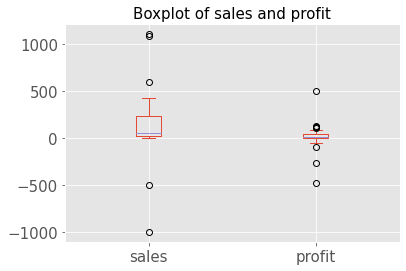

In [48]:
df_sample.plot.box()
plt.title("Boxplot of sales and profit", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

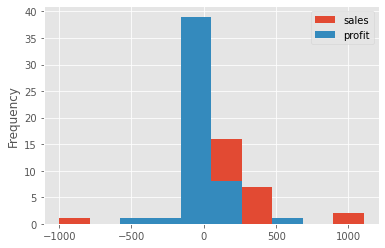

In [49]:
df_sample.plot.hist()

## Concatenation

In [50]:
df1 = store[['customer_name', 'state', 'sales','profit']].sample(4)
df2 = store[['customer_name', 'state', 'sales','profit']].sample(6)
df3 = store[['customer_name', 'state', 'sales','profit']].sample(4)
df4 = store[['customer_name', 'state', 'sales','profit']].sample(2)

df_cat1 = pd.concat([df1,df2,df3,df4], axis=0)
df_cat1

,customer_name,state,sales,profit
7898,Dan Campbell,Tennessee,1614.582,-1237.8462
5807,Delfina Latchford,Tennessee,87.168,8.7168
3236,Cindy Chapman,New York,44.940,12.5832
5112,Helen Abelman,Illinois,17.496,-7.4358
4176,Roland Schwarz,South Carolina,629.950,163.7870
5649,Anthony Johnson,California,57.900,28.9500
9707,Carlos Soltero,California,12.390,5.6994
4056,Suzanne McNair,Pennsylvania,67.176,-20.1528
7521,Maribeth Dona,Ohio,8.952,-7.4600
3826,John Grady,Texas,107.440,10.7440


## Merging

In [51]:
df_1 = store.loc[0:3, ['ship_date','ship_mode','customer_name']]
df_1

,ship_date,ship_mode,customer_name
0,2016-11-11,Second Class,Claire Gute
1,2016-11-11,Second Class,Claire Gute
2,2016-06-16,Second Class,Darrin Van Huff
3,2015-10-18,Standard Class,Sean O'Donnell


In [52]:
df_2 = store.loc[0:3, ['customer_name','product_name','quantity']]
df_2

,customer_name,product_name,quantity
0,Claire Gute,Bush Somerset Collection Bookcase,2
1,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3
2,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
3,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5


In [53]:
pd.merge(df_1, df_2, on='customer_name', how='inner')

,ship_date,ship_mode,customer_name,product_name,quantity
0,2016-11-11,Second Class,Claire Gute,Bush Somerset Collection Bookcase,2
1,2016-11-11,Second Class,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3
2,2016-11-11,Second Class,Claire Gute,Bush Somerset Collection Bookcase,2
3,2016-11-11,Second Class,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3
4,2016-06-16,Second Class,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
5,2015-10-18,Standard Class,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5


In [54]:
pd.merge(df_1, df_2, on='customer_name', how='inner').drop_duplicates()

,ship_date,ship_mode,customer_name,product_name,quantity
0,2016-11-11,Second Class,Claire Gute,Bush Somerset Collection Bookcase,2
1,2016-11-11,Second Class,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3
4,2016-06-16,Second Class,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
5,2015-10-18,Standard Class,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5


In [55]:
df_3 = store.loc[2:5, ['customer_name','product_name','quantity']]
df_3

,customer_name,product_name,quantity
2,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
3,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5
4,Sean O'Donnell,Eldon Fold 'N Roll Cart System,2
5,Brosina Hoffman,Eldon Expressions Wood and Plastic Desk Access...,7


In [56]:
pd.merge(df_1, df_3, on='customer_name', how='inner').drop_duplicates()

,ship_date,ship_mode,customer_name,product_name,quantity
0,2016-06-16,Second Class,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
1,2015-10-18,Standard Class,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5
2,2015-10-18,Standard Class,Sean O'Donnell,Eldon Fold 'N Roll Cart System,2


In [57]:
pd.merge(df_1, df_3, on='customer_name', how='outer').drop_duplicates()

,ship_date,ship_mode,customer_name,product_name,quantity
0,2016-11-11,Second Class,Claire Gute,NaN,NaN
2,2016-06-16,Second Class,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2.0
3,2015-10-18,Standard Class,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5.0
4,2015-10-18,Standard Class,Sean O'Donnell,Eldon Fold 'N Roll Cart System,2.0
5,NaT,NaN,Brosina Hoffman,Eldon Expressions Wood and Plastic Desk Access...,7.0


In [58]:
df_1

,ship_date,ship_mode,customer_name
0,2016-11-11,Second Class,Claire Gute
1,2016-11-11,Second Class,Claire Gute
2,2016-06-16,Second Class,Darrin Van Huff
3,2015-10-18,Standard Class,Sean O'Donnell


In [59]:
df_3

,customer_name,product_name,quantity
2,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
3,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5
4,Sean O'Donnell,Eldon Fold 'N Roll Cart System,2
5,Brosina Hoffman,Eldon Expressions Wood and Plastic Desk Access...,7


## The join Method

In [60]:
df_1 = store.loc[0:3, ['ship_date','ship_mode','customer_name']]

In [61]:
df_1.set_index('customer_name', inplace=True)
df_1

,ship_date,ship_mode
customer_name,,
Claire Gute,2016-11-11,Second Class
Claire Gute,2016-11-11,Second Class
Darrin Van Huff,2016-06-16,Second Class
Sean O'Donnell,2015-10-18,Standard Class


In [62]:
df_2 = store.loc[2:5, ['customer_name','product_name','quantity']]

In [63]:
df_2.set_index('customer_name', inplace=True)
df_2

,product_name,quantity
customer_name,,
Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5
Sean O'Donnell,Eldon Fold 'N Roll Cart System,2
Brosina Hoffman,Eldon Expressions Wood and Plastic Desk Access...,7


In [64]:
df_1.join(df_2, how='left').drop_duplicates()

,ship_date,ship_mode,product_name,quantity
customer_name,,,,
Claire Gute,2016-11-11,Second Class,NaN,NaN
Darrin Van Huff,2016-06-16,Second Class,Self-Adhesive Address Labels for Typewriters b...,2.0
Sean O'Donnell,2015-10-18,Standard Class,Bretford CR4500 Series Slim Rectangular Table,5.0
Sean O'Donnell,2015-10-18,Standard Class,Eldon Fold 'N Roll Cart System,2.0


In [65]:
df_1.join(df_2, how='right').drop_duplicates()

,ship_date,ship_mode,product_name,quantity
customer_name,,,,
Brosina Hoffman,NaT,NaN,Eldon Expressions Wood and Plastic Desk Access...,7
Darrin Van Huff,2016-06-16,Second Class,Self-Adhesive Address Labels for Typewriters b...,2
Sean O'Donnell,2015-10-18,Standard Class,Bretford CR4500 Series Slim Rectangular Table,5
Sean O'Donnell,2015-10-18,Standard Class,Eldon Fold 'N Roll Cart System,2


In [66]:
df_1.join(df_2, how='inner').drop_duplicates()

,ship_date,ship_mode,product_name,quantity
customer_name,,,,
Darrin Van Huff,2016-06-16,Second Class,Self-Adhesive Address Labels for Typewriters b...,2
Sean O'Donnell,2015-10-18,Standard Class,Bretford CR4500 Series Slim Rectangular Table,5
Sean O'Donnell,2015-10-18,Standard Class,Eldon Fold 'N Roll Cart System,2


In [67]:
df_1.join(df_2,how='outer').drop_duplicates()

,ship_date,ship_mode,product_name,quantity
customer_name,,,,
Brosina Hoffman,NaT,NaN,Eldon Expressions Wood and Plastic Desk Access...,7.0
Claire Gute,2016-11-11,Second Class,NaN,NaN
Darrin Van Huff,2016-06-16,Second Class,Self-Adhesive Address Labels for Typewriters b...,2.0
Sean O'Donnell,2015-10-18,Standard Class,Bretford CR4500 Series Slim Rectangular Table,5.0
Sean O'Donnell,2015-10-18,Standard Class,Eldon Fold 'N Roll Cart System,2.0


## The value_counts Method

In [68]:
store.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'sub-category', 'product_name',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [69]:
store[['customer_name']].value_counts().head(10)

customer_name      
William Brown          37
Matt Abelman           34
John Lee               34
Paul Prost             34
Edward Hooks           32
Chloris Kastensmidt    32
Seth Vernon            32
Jonathan Doherty       32
Zuschuss Carroll       31
Arthur Prichep         31
dtype: int64

## Pivot Table Functionality

In [70]:
df_sample = store.sample(1000)
df_sample.pivot_table(values=['sales', 'quantity', 'profit'], index=['region', 'state'], aggfunc='mean')

profit  quantity        sales
region  state                                                  
Central Illinois              -48.354226  3.307692   125.459333
        Indiana                44.491937  4.052632   169.116842
        Iowa                   45.808500  2.500000   159.350000
        Kansas                  9.356000  2.000000   108.496667
        Michigan               56.824446  3.692308   240.732731
        Minnesota             263.168267  5.000000   992.966667
        Missouri               83.473600  3.000000   302.510000
        Nebraska              266.095533  3.000000   878.990000
        Oklahoma              260.576467  8.333333   977.033333
        Texas                 -24.957382  3.699029   156.591864
        Wisconsin              77.742900  4.473684   324.788421
East    Connecticut            55.710700  3.500000   187.356250
        Delaware               33.651775  3.333333    98.454167
        District of Columbia  316.882500  3.000000  1267.530000
        Maryland               90.017938  4.615385   305.807692
        Massachusetts          48.311700  2.500000   157.589167
        New Hampshire          52.305350  4.250000   165.392500
        New Jersey             46.326233  3.166667   170.166667
        New York               56.140576  3.290909   267.449855
        Ohio                 -139.794704  4.080000   194.305220
        Pennsylvania          -48.564827  3.712121   264.430697
        Rhode Island          136.665100  5.000000   476.466000
South   Alabama                13.416540  2.200000    27.962000
        Arkansas              146.430643  4.000000   477.848571
        Florida               -56.590426  3.657895   769.350829
        Georgia                43.657800  4.277778   141.906667
        Kentucky               39.498329  3.235294   106.384118
        Louisiana             116.969320  5.000000   363.146000
        Mississippi             5.861000  2.500000    12.300000
        North Carolina         13.389297  4.387097   195.420968
        South Carolina        119.990450  4.500000   452.195000
        Tennessee              -9.224893  3.333333   124.559133
        Virginia               58.020141  3.772727   219.697727
West    Arizona               -14.804414  3.571429   125.150214
        California             45.218490  3.921296   248.631255
        Colorado              -35.993146  3.923077   180.995846
        Idaho                  92.393600  4.000000   355.360000
        Montana               696.958100  4.000000  1514.495000
        Nevada                  8.082533  3.333333    18.032000
        New Mexico              8.142600  2.600000    73.166800
        Oregon                -23.090889  2.444444    49.089000
        Utah                   19.609600  3.666667    54.896000
        Washington             93.304663  3.978261   367.135478

In [71]:
store.sample(15).sort_values(by=['sales'], ascending=False)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
2357,US-2014-148838,2014-03-17,2014-03-21,Standard Class,CP-12340,Christine Phan,Corporate,United States,New York City,New York,10024,East,FUR-TA-10003473,Furniture,Tables,Bretford Rectangular Conference Table Tops,1579.746,7,0.4,-447.5947
54,CA-2016-105816,2016-12-11,2016-12-17,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,New York,10024,East,TEC-PH-10002447,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.950,5,0.0,298.6855
7836,CA-2015-149083,2015-09-25,2015-09-30,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Seattle,Washington,98103,West,FUR-CH-10004289,Furniture,Chairs,Global Super Steno Chair,307.136,4,0.2,-11.5176
3505,CA-2014-166863,2014-06-20,2014-06-24,Standard Class,SC-20020,Sam Craven,Consumer,United States,Plano,Texas,75023,Central,TEC-PH-10000369,Technology,Phones,HTC One Mini,201.584,2,0.2,20.1584
26,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,California,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
6680,CA-2017-145037,2017-09-02,2017-09-07,Second Class,TB-21055,Ted Butterfield,Consumer,United States,Meriden,Connecticut,6450,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.920,4,0.0,37.5624
5695,CA-2016-126165,2016-05-05,2016-05-07,Second Class,AH-10465,Amy Hunt,Consumer,United States,San Francisco,California,94109,West,FUR-TA-10001676,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.088,2,0.2,-1.7772
7076,CA-2016-167416,2016-05-12,2016-05-17,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Seattle,Washington,98105,West,OFF-EN-10001141,Office Supplies,Envelopes,Manila Recycled Extra-Heavyweight Clasp Envelo...,54.900,5,0.0,26.9010
6128,US-2014-158400,2014-10-25,2014-10-28,First Class,AH-10030,Aaron Hawkins,Corporate,United States,San Francisco,California,94109,West,OFF-BI-10002353,Office Supplies,Binders,GBC VeloBind Cover Sets,49.408,4,0.2,18.5280
6318,CA-2017-161459,2017-11-25,2017-11-29,Second Class,EB-13750,Edward Becker,Corporate,United States,Laguna Niguel,California,92677,West,TEC-PH-10004071,Technology,Phones,PayAnywhere Card Reader,39.960,5,0.2,3.4965


In [72]:
store.sample(15).sort_values(by=['sales', 'state'], ascending=False)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
5725,CA-2015-103933,2015-09-25,2015-09-27,First Class,DR-12880,Dan Reichenbach,Corporate,United States,New York City,New York,10011,East,TEC-AC-10004171,Technology,Accessories,Razer Kraken 7.1 Surround Sound Over Ear USB G...,899.910,9,0.0,395.9604
2494,CA-2016-146206,2016-09-10,2016-09-14,Second Class,KT-16480,Kean Thornton,Consumer,United States,Houston,Texas,77095,Central,TEC-PH-10000895,Technology,Phones,Polycom VVX 310 VoIP phone,719.960,5,0.2,53.9970
6635,CA-2017-144498,2017-05-06,2017-05-06,Same Day,MB-18085,Mick Brown,Consumer,United States,Charlotte,North Carolina,28205,South,TEC-PH-10004977,Technology,Phones,GE 30524EE4,627.168,4,0.2,70.5564
3511,CA-2014-166863,2014-06-20,2014-06-24,Standard Class,SC-20020,Sam Craven,Consumer,United States,Plano,Texas,75023,Central,OFF-ST-10004123,Office Supplies,Storage,Safco Industrial Wire Shelving System,509.488,7,0.2,-127.3720
7557,CA-2017-159506,2017-11-27,2017-12-02,Standard Class,JR-16210,Justin Ritter,Corporate,United States,Columbus,Indiana,47201,Central,OFF-BI-10004519,Office Supplies,Binders,GBC DocuBind P100 Manual Binding Machine,497.940,3,0.0,224.0730
911,CA-2017-137596,2017-09-02,2017-09-07,Standard Class,BE-11335,Bill Eplett,Home Office,United States,Jackson,Michigan,49201,Central,OFF-ST-10003816,Office Supplies,Storage,Fellowes High-Stak Drawer Files,352.380,2,0.0,81.0474
8761,CA-2016-159891,2016-01-31,2016-02-06,Standard Class,BF-11170,Ben Ferrer,Home Office,United States,Atlanta,Georgia,30318,South,OFF-EN-10004483,Office Supplies,Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2",125.360,8,0.0,58.9192
6355,CA-2014-110611,2014-10-06,2014-10-13,Standard Class,JD-16015,Joy Daniels,Consumer,United States,Philadelphia,Pennsylvania,19120,East,OFF-ST-10000642,Office Supplies,Storage,"Tennsco Lockers, Gray",83.920,5,0.2,-13.6370
3215,CA-2017-150189,2017-07-08,2017-07-10,First Class,VG-21790,Vivek Gonzalez,Consumer,United States,San Mateo,California,94403,West,OFF-LA-10002762,Office Supplies,Labels,Avery 485,75.180,6,0.0,35.3346
6700,CA-2017-145429,2017-07-21,2017-07-25,Standard Class,SW-20455,Shaun Weien,Consumer,United States,San Diego,California,92024,West,OFF-BI-10001524,Office Supplies,Binders,GBC Premium Transparent Covers with Diagonal L...,50.352,3,0.2,17.6232


## The apply Method

In [73]:
def categorize_sales(num):
  if num < 50:
    return 'low'

  elif num < 200:
    return 'medium'
  
  elif num >= 200:
    return 'High'


In [74]:
df_sample = store.sample(100)
df_sample['sales_category'] = df_sample['sales'].apply(categorize_sales)
df_sample

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,sales_category
8572,CA-2014-121629,2014-11-28,2014-12-02,Standard Class,BT-11680,Brian Thompson,Consumer,United States,Houston,Texas,...,Central,TEC-MA-10004679,Technology,Machines,StarTech.com 10/100 VDSL2 Ethernet Extender Kit,998.850,5,0.4,-199.7700,High
7003,CA-2014-133158,2014-08-19,2014-08-21,Second Class,DW-13195,David Wiener,Corporate,United States,Los Angeles,California,...,West,OFF-BI-10000632,Office Supplies,Binders,Satellite Sectional Post Binders,69.456,2,0.2,22.5732,medium
3299,US-2014-159926,2014-11-18,2014-11-22,Standard Class,CS-11950,Carlos Soltero,Consumer,United States,Philadelphia,Pennsylvania,...,East,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,50.997,1,0.7,-40.7976,medium
3119,CA-2015-121720,2015-06-11,2015-06-12,First Class,JE-15610,Jim Epp,Corporate,United States,Lakeland,Florida,...,South,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.584,2,0.2,31.1980,High
4125,CA-2017-123239,2017-07-27,2017-07-31,Second Class,MG-18145,Mike Gockenbach,Consumer,United States,Jacksonville,Florida,...,South,FUR-FU-10001602,Furniture,Furnishings,"Eldon Delta Triangular Chair Mat, 52"" x 58"", C...",91.032,3,0.2,-2.2758,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236,CA-2017-102204,2017-05-01,2017-05-06,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Jacksonville,Florida,...,South,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,2803.920,5,0.2,0.0000,High
6203,CA-2016-133669,2016-10-21,2016-10-27,Standard Class,SV-20935,Susan Vittorini,Consumer,United States,Columbus,Ohio,...,East,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,235.152,8,0.4,-47.0304,High
3215,CA-2017-150189,2017-07-08,2017-07-10,First Class,VG-21790,Vivek Gonzalez,Consumer,United States,San Mateo,California,...,West,OFF-LA-10002762,Office Supplies,Labels,Avery 485,75.180,6,0.0,35.3346,medium
325,CA-2017-153339,2017-11-03,2017-11-05,Second Class,DJ-13510,Don Jones,Corporate,United States,Murfreesboro,Tennessee,...,South,FUR-FU-10001967,Furniture,Furnishings,Telescoping Adjustable Floor Lamp,15.992,1,0.2,0.9995,low


In [75]:
df_sample['discount_price'] = df_sample['sales'].apply(lambda x: .85*x if x >200 else x)
df_sample.head(2)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,sales_category,discount_price
8572,CA-2014-121629,2014-11-28,2014-12-02,Standard Class,BT-11680,Brian Thompson,Consumer,United States,Houston,Texas,...,TEC-MA-10004679,Technology,Machines,StarTech.com 10/100 VDSL2 Ethernet Extender Kit,998.850,5,0.4,-199.7700,High,849.0225
7003,CA-2014-133158,2014-08-19,2014-08-21,Second Class,DW-13195,David Wiener,Corporate,United States,Los Angeles,California,...,OFF-BI-10000632,Office Supplies,Binders,Satellite Sectional Post Binders,69.456,2,0.2,22.5732,medium,69.4560
